In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
%matplotlib inline
from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_excel('2019 County Health Rankings Data - v2.xls',3,header=1)

df_addtl = pd.read_excel('2019 County Health Rankings Data - v2.xls',5,header=1)

xls = pd.ExcelFile('unemployment.xls')

unemployment = xls.parse('Unemployment Med HH Inc', skiprows=4, index_col=None, na_values=['NA'])


In [3]:
df_addtl = df_addtl[['FIPS',
                     '% Frequent Physical Distress',
                     '% Frequent Mental Distress',
                     '% Food Insecure',
                     '% Limited Access',
                     '% Insufficient Sleep',
                     '% Uninsured',
                     '% Homeowners',
                     '% Severe Housing Cost Burden',
                     'Population'
                    ]]

In [4]:
df_addtl.head()

FIPS  % Frequent Physical Distress  % Frequent Mental Distress  % Food Insecure  % Limited Access  % Insufficient Sleep  % Uninsured  % Homeowners  % Severe Housing Cost Burden  Population
0  1001                     12.824434                   12.638357             13.4         11.991125             35.905406    10.961104     73.287736                     12.645206       55504
1  1003                     12.622002                   12.822558             12.3          5.424427             33.305868    13.570311     72.859338                     12.795922      212628
2  1005                     16.216160                   14.632311             23.2         10.739667             38.563167    16.542240     62.506800                     13.586765       25270
3  1007                     13.162968                   12.854036             15.8          2.601627             38.148865    12.297319     75.361481                      8.733889       22668
4  1009                     13.720057                   13.827943             11.0          2.880150             35.945010    15.564604     78.521025                      8.194495       58013

In [5]:
unemployment.head()

FIPS State           Area_name  Rural_urban_continuum_code_2013  Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  Employed_2007  Unemployed_2007  Unemployment_rate_2007  Civilian_labor_force_2008  Employed_2008  Unemployed_2008  Unemployment_rate_2008  Civilian_labor_force_2009  Employed_2009  Unemployed_2009  Unemployment_rate_2009  Civilian_labor_force_2010  Employed_2010  Unemployed_2010  Unemployment_rate_2010  Civilian_labor_force_2011  Employed_2011  Unemployed_2011  Unemployment_rate_2011  Civilian_labor_force_2012  Employed_2012  Unemployed_2012  Unemployment_rate_2012  Civilian_labor_force_2013  Employed_2013  Unemployed_2013  Unemployment_rate_2013  Civilian_labor_force_2014  Employed_2014  Unemployed_2014  Unemployment_rate_2014  Civilian_labor_force_2015  Employed_2015  Unemployed_2015  Unemployment_rate_2015  Civilian_labor_force_2016  Employed_2016  Unemployed_2016  Unemployment_rate_2016  Civilian_labor_force_2017  Employed_2017  Unemployed_2017  \
0     0    US       United States                              NaN                        NaN         NaN                152191093.0    145156134.0        7034959.0                     4.6                153761095.0    144860350.0        8900745.0                     5.8                153825455.0    139594698.0       14230757.0                     9.3                154270732.0    139408204.0       14862528.0                    9.63                154606316.0    140765809.0       13840507.0                    8.95                155119195.0    142600402.0       12518793.0                    8.07                155485692.0    144018151.0       11467541.0                    7.38                155957297.0    146338305.0        9618992.0                    6.17                156866585.0    148579026.0        8287559.0                    5.28                158708795.0    150981151.0        7727644.0                    4.87                160273906.0    153293830.0        6980076.0   
1  1000    AL             Alabama                              NaN                        NaN         NaN                  2175612.0      2089127.0          86485.0                     4.0                  2176489.0      2053477.0         123012.0                     5.7                  2162999.0      1924747.0         238252.0                    11.0                  2196042.0      1964559.0         231483.0                   10.50                  2202670.0      1990413.0         212257.0                    9.60                  2176337.0      2003290.0         173047.0                    8.00                  2174000.0      2017043.0         156957.0                    7.20                  2160842.0      2014290.0         146552.0                    6.80                  2158293.0      2026898.0         131395.0                    6.10                  2177209.0      2049971.0         127238.0                    5.80                  2178243.0      2081676.0          96567.0   
2  1001    AL  Autauga County, AL                              2.0                        2.0         1.0                    24383.0        23577.0            806.0                     3.3                    24687.0        23420.0           1267.0                     5.1                    24703.0        22301.0           2402.0                     9.7                    25713.0        23431.0           2282.0                    8.90                    25836.0        23677.0           2159.0                    8.40                    25740.0        23961.0           1779.0                    6.90                    25810.0        24205.0           1605.0                    6.20                    25592.0        24097.0           1495.0                    5.80                    25613.0        24283.0           1330.0                    5.20                    25966.0        24645.0           1321.0                    5.10                    25972.0        24958.0           1014.0   
3  1003    

In [6]:
unemployment = unemployment[['FIPS','Unemployment_rate_2018','Median_Household_Income_2018',
                            'Unemployed_avg(2007-2018)']]
unemployment.head()

FIPS  Unemployment_rate_2018  Median_Household_Income_2018  Unemployed_avg(2007-2018)
0     0                     3.9                       61937.0                        NaN
1  1000                     3.9                       49881.0                   6.916667
2  1001                     3.6                       59338.0                   6.008333
3  1003                     3.6                       57588.0                   6.266667
4  1005                     5.2                       34382.0                   9.466667

In [7]:
df=df[['FIPS','State', 'County',
#            'Violent Crime Rate',
#            'Years of Potential Life Lost Rate',
           '% Fair/Poor',
           'Physically Unhealthy Days',
           'Mentally Unhealthy Days',
#            '% LBW',
           '% Smokers',
           '% Obese',
           'Food Environment Index',
           '% Physically Inactive',
           '% With Access',
           '% Excessive Drinking',
#            '% Alcohol-Impaired', 
#            'Chlamydia Rate',
#            'Teen Birth Rate',
#            '% Uninsured',
           'PCP Rate',
           'Dentist Rate',
           'MHP Rate',
#            'Preventable Hosp. Rate',
#            '% Screened',
#            '% Vaccinated',
           'Graduation Rate',
           '% Some College',
#            '% Unemployed',
#            '% Children in Poverty',
           'Income Ratio',
#            '% Single-Parent Households',
           'Association Rate',
#            'Injury Death Rate',
#            'Average Daily PM2.5',
#            'Presence of violation',
           '% Severe Housing Problems',
           '% Drive Alone',
           '% Long Commute - Drives Alone'
          ]]
df.head(3)

FIPS    State   County  % Fair/Poor  Physically Unhealthy Days  Mentally Unhealthy Days  % Smokers  % Obese  Food Environment Index  % Physically Inactive  % With Access  % Excessive Drinking  PCP Rate  Dentist Rate  MHP Rate  Graduation Rate  % Some College  Income Ratio  Association Rate  % Severe Housing Problems  % Drive Alone  % Long Commute - Drives Alone
0  1001  Alabama  Autauga    18.411124                   4.200578                 4.306739  19.124658     37.5                     7.2                   31.1      68.677503             16.878015  41.50426      32.43010  16.21505        90.000000       60.854665      4.636664         12.631731                  14.954646      85.965057                           38.3
1  1003  Alabama  Baldwin    18.060458                   4.098748                 4.249649  16.795485     31.0                     8.0                   23.8      71.971031             16.714969  72.87966      49.85232  91.23916        86.361577       66.133926      4.518560         10.692213                  13.831725      84.719423                           40.5
2  1005  Alabama  Barbour    25.773416                   5.067438                 4.634994  21.540878     44.3                     5.6                   28.2      53.625669             12.698715  38.51338      35.61535   7.91452        81.410256       36.774008      5.755063          8.472944                  15.455531      83.404353                           33.8

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 22 columns):
FIPS                             3142 non-null int64
State                            3142 non-null object
County                           3142 non-null object
% Fair/Poor                      3142 non-null float64
Physically Unhealthy Days        3142 non-null float64
Mentally Unhealthy Days          3142 non-null float64
% Smokers                        3142 non-null float64
% Obese                          3142 non-null float64
Food Environment Index           3123 non-null float64
% Physically Inactive            3142 non-null float64
% With Access                    3136 non-null float64
% Excessive Drinking             3142 non-null float64
PCP Rate                         3007 non-null float64
Dentist Rate                     3057 non-null float64
MHP Rate                         2890 non-null float64
Graduation Rate                  3043 non-null float64
% Some College   

In [9]:
df_2 = (pd.merge(df,df_addtl, how='left', on=['FIPS']))

df_new = pd.merge(df_2, unemployment, how='left', on=['FIPS'])

In [10]:
df_new.head()

FIPS    State   County  % Fair/Poor  Physically Unhealthy Days  Mentally Unhealthy Days  % Smokers  % Obese  Food Environment Index  % Physically Inactive  % With Access  % Excessive Drinking  PCP Rate  Dentist Rate  MHP Rate  Graduation Rate  % Some College  Income Ratio  Association Rate  % Severe Housing Problems  % Drive Alone  % Long Commute - Drives Alone  % Frequent Physical Distress  % Frequent Mental Distress  % Food Insecure  % Limited Access  % Insufficient Sleep  % Uninsured  % Homeowners  % Severe Housing Cost Burden  Population  Unemployment_rate_2018  Median_Household_Income_2018  Unemployed_avg(2007-2018)
0  1001  Alabama  Autauga    18.411124                   4.200578                 4.306739  19.124658     37.5                     7.2                   31.1      68.677503             16.878015  41.50426      32.43010  16.21505        90.000000       60.854665      4.636664         12.631731                  14.954646      85.965057                           38.3                     12.824434                   12.638357             13.4         11.991125             35.905406    10.961104     73.287736                     12.645206       55504                     3.6                       59338.0                   6.008333
1  1003  Alabama  Baldwin    18.060458                   4.098748                 4.249649  16.795485     31.0                     8.0                   23.8      71.971031             16.714969  72.87966      49.85232  91.23916        86.361577       66.133926      4.518560         10.692213                  13.831725      84.719423                           40.5                     12.622002                   12.822558             12.3          5.424427             33.305868    13.570311     72.859338                     12.795922      212628                     3.6                       57588.0                   6.266667
2  1005  Alabama  Barbour    25.773416                   5.067438                 4.634994  21.540878     44.3                     5.6                   28.2      53.625669             12.698715  38.51338      35.61535   7.91452        81.410256       36.774008      5.755063          8.472944                  15.455531      83.404353                           33.8                     16.216160                   14.632311             23.2         10.739667             38.563167    16.542240     62.506800                     13.586765       25270                     5.2                       34382.0                   9.466667
3  1007  Alabama     Bibb    19.996912                   4.363377                 4.315710  19.916404     37.8                     7.6                   34.9      16.251364             15.925151  57.41289      26.46903   8.82301        83.763838       48.406310      4.254594         10.157665                  10.960854      86.365902                           48.6                     13.162968                   12.854036             15.8          2.601627             38.148865    12.297319     75.361481                      8.733889       22668                     4.0                       46064.0                   7.508333
4  1009  Alabama   Blount    21.095323                   4.512753                 4.701599  19.652158     34.4                     8.5                   28.5      22.949304             15.378722  22.52877      20.68502  10.34251        93.468795       54.413998      4.126883          9.011507                  10.401153      86.792275                           59.7                     13.720057                   13.827943             11.0          2.880150             35.945010    15.564604     78.521025                      8.194495       58013                     3.5                       50412.0                   6.166667

In [11]:
df_new.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 34 columns):
FIPS                             3142 non-null int64
State                            3142 non-null object
County                           3142 non-null object
% Fair/Poor                      3142 non-null float64
Physically Unhealthy Days        3142 non-null float64
Mentally Unhealthy Days          3142 non-null float64
% Smokers                        3142 non-null float64
% Obese                          3142 non-null float64
Food Environment Index           3123 non-null float64
% Physically Inactive            3142 non-null float64
% With Access                    3136 non-null float64
% Excessive Drinking             3142 non-null float64
PCP Rate                         3007 non-null float64
Dentist Rate                     3057 non-null float64
MHP Rate                         2890 non-null float64
Graduation Rate                  3043 non-null float64
% Some College   

In [12]:
df_new.head()

FIPS    State   County  % Fair/Poor  Physically Unhealthy Days  Mentally Unhealthy Days  % Smokers  % Obese  Food Environment Index  % Physically Inactive  % With Access  % Excessive Drinking  PCP Rate  Dentist Rate  MHP Rate  Graduation Rate  % Some College  Income Ratio  Association Rate  % Severe Housing Problems  % Drive Alone  % Long Commute - Drives Alone  % Frequent Physical Distress  % Frequent Mental Distress  % Food Insecure  % Limited Access  % Insufficient Sleep  % Uninsured  % Homeowners  % Severe Housing Cost Burden  Population  Unemployment_rate_2018  Median_Household_Income_2018  Unemployed_avg(2007-2018)
0  1001  Alabama  Autauga    18.411124                   4.200578                 4.306739  19.124658     37.5                     7.2                   31.1      68.677503             16.878015  41.50426      32.43010  16.21505        90.000000       60.854665      4.636664         12.631731                  14.954646      85.965057                           38.3                     12.824434                   12.638357             13.4         11.991125             35.905406    10.961104     73.287736                     12.645206       55504                     3.6                       59338.0                   6.008333
1  1003  Alabama  Baldwin    18.060458                   4.098748                 4.249649  16.795485     31.0                     8.0                   23.8      71.971031             16.714969  72.87966      49.85232  91.23916        86.361577       66.133926      4.518560         10.692213                  13.831725      84.719423                           40.5                     12.622002                   12.822558             12.3          5.424427             33.305868    13.570311     72.859338                     12.795922      212628                     3.6                       57588.0                   6.266667
2  1005  Alabama  Barbour    25.773416                   5.067438                 4.634994  21.540878     44.3                     5.6                   28.2      53.625669             12.698715  38.51338      35.61535   7.91452        81.410256       36.774008      5.755063          8.472944                  15.455531      83.404353                           33.8                     16.216160                   14.632311             23.2         10.739667             38.563167    16.542240     62.506800                     13.586765       25270                     5.2                       34382.0                   9.466667
3  1007  Alabama     Bibb    19.996912                   4.363377                 4.315710  19.916404     37.8                     7.6                   34.9      16.251364             15.925151  57.41289      26.46903   8.82301        83.763838       48.406310      4.254594         10.157665                  10.960854      86.365902                           48.6                     13.162968                   12.854036             15.8          2.601627             38.148865    12.297319     75.361481                      8.733889       22668                     4.0                       46064.0                   7.508333
4  1009  Alabama   Blount    21.095323                   4.512753                 4.701599  19.652158     34.4                     8.5                   28.5      22.949304             15.378722  22.52877      20.68502  10.34251        93.468795       54.413998      4.126883          9.011507                  10.401153      86.792275                           59.7                     13.720057                   13.827943             11.0          2.880150             35.945010    15.564604     78.521025                      8.194495       58013                     3.5                       50412.0                   6.166667

In [13]:
df_new.isna().sum()

FIPS                               0
State                              0
County                             0
% Fair/Poor                        0
Physically Unhealthy Days          0
Mentally Unhealthy Days            0
% Smokers                          0
% Obese                            0
Food Environment Index            19
% Physically Inactive              0
% With Access                      6
% Excessive Drinking               0
PCP Rate                         135
Dentist Rate                      85
MHP Rate                         252
Graduation Rate                   99
% Some College                     0
Income Ratio                       0
Association Rate                   0
% Severe Housing Problems          0
% Drive Alone                      0
% Long Commute - Drives Alone      0
% Frequent Physical Distress       0
% Frequent Mental Distress         0
% Food Insecure                    0
% Limited Access                  19
% Insufficient Sleep               0
%

In [14]:
column_isna_list = ['Food Environment Index',
                    '% With Access',
               'PCP Rate',
                   'Dentist Rate',
                   'MHP Rate',
                    'Graduation Rate',
                    '% Limited Access'] 

for column in column_isna_list:
    df_new[column] = df_new.groupby("State")[column].transform(lambda x: x.fillna(x.mean()))
# replace null values with state average





In [15]:
df_new.head()

FIPS    State   County  % Fair/Poor  Physically Unhealthy Days  Mentally Unhealthy Days  % Smokers  % Obese  Food Environment Index  % Physically Inactive  % With Access  % Excessive Drinking  PCP Rate  Dentist Rate  MHP Rate  Graduation Rate  % Some College  Income Ratio  Association Rate  % Severe Housing Problems  % Drive Alone  % Long Commute - Drives Alone  % Frequent Physical Distress  % Frequent Mental Distress  % Food Insecure  % Limited Access  % Insufficient Sleep  % Uninsured  % Homeowners  % Severe Housing Cost Burden  Population  Unemployment_rate_2018  Median_Household_Income_2018  Unemployed_avg(2007-2018)
0  1001  Alabama  Autauga    18.411124                   4.200578                 4.306739  19.124658     37.5                     7.2                   31.1      68.677503             16.878015  41.50426      32.43010  16.21505        90.000000       60.854665      4.636664         12.631731                  14.954646      85.965057                           38.3                     12.824434                   12.638357             13.4         11.991125             35.905406    10.961104     73.287736                     12.645206       55504                     3.6                       59338.0                   6.008333
1  1003  Alabama  Baldwin    18.060458                   4.098748                 4.249649  16.795485     31.0                     8.0                   23.8      71.971031             16.714969  72.87966      49.85232  91.23916        86.361577       66.133926      4.518560         10.692213                  13.831725      84.719423                           40.5                     12.622002                   12.822558             12.3          5.424427             33.305868    13.570311     72.859338                     12.795922      212628                     3.6                       57588.0                   6.266667
2  1005  Alabama  Barbour    25.773416                   5.067438                 4.634994  21.540878     44.3                     5.6                   28.2      53.625669             12.698715  38.51338      35.61535   7.91452        81.410256       36.774008      5.755063          8.472944                  15.455531      83.404353                           33.8                     16.216160                   14.632311             23.2         10.739667             38.563167    16.542240     62.506800                     13.586765       25270                     5.2                       34382.0                   9.466667
3  1007  Alabama     Bibb    19.996912                   4.363377                 4.315710  19.916404     37.8                     7.6                   34.9      16.251364             15.925151  57.41289      26.46903   8.82301        83.763838       48.406310      4.254594         10.157665                  10.960854      86.365902                           48.6                     13.162968                   12.854036             15.8          2.601627             38.148865    12.297319     75.361481                      8.733889       22668                     4.0                       46064.0                   7.508333
4  1009  Alabama   Blount    21.095323                   4.512753                 4.701599  19.652158     34.4                     8.5                   28.5      22.949304             15.378722  22.52877      20.68502  10.34251        93.468795       54.413998      4.126883          9.011507                  10.401153      86.792275                           59.7                     13.720057                   13.827943             11.0          2.880150             35.945010    15.564604     78.521025                      8.194495       58013                     3.5                       50412.0                   6.166667

In [16]:
df_new.isna().sum()

FIPS                             0
State                            0
County                           0
% Fair/Poor                      0
Physically Unhealthy Days        0
Mentally Unhealthy Days          0
% Smokers                        0
% Obese                          0
Food Environment Index           0
% Physically Inactive            0
% With Access                    0
% Excessive Drinking             0
PCP Rate                         0
Dentist Rate                     0
MHP Rate                         0
Graduation Rate                  0
% Some College                   0
Income Ratio                     0
Association Rate                 0
% Severe Housing Problems        0
% Drive Alone                    0
% Long Commute - Drives Alone    0
% Frequent Physical Distress     0
% Frequent Mental Distress       0
% Food Insecure                  0
% Limited Access                 0
% Insufficient Sleep             0
% Uninsured                      1
% Homeowners        

In [17]:
df1 = df_new[df_new.isna().any(axis=1)]

df1
# small population counties with multiple null values, so drop

FIPS   State   County  % Fair/Poor  Physically Unhealthy Days  Mentally Unhealthy Days  % Smokers  % Obese  Food Environment Index  % Physically Inactive  % With Access  % Excessive Drinking  PCP Rate  Dentist Rate  MHP Rate  Graduation Rate  % Some College  Income Ratio  Association Rate  % Severe Housing Problems  % Drive Alone  % Long Commute - Drives Alone  % Frequent Physical Distress  % Frequent Mental Distress  % Food Insecure  % Limited Access  % Insufficient Sleep  % Uninsured  % Homeowners  % Severe Housing Cost Burden  Population  Unemployment_rate_2018  Median_Household_Income_2018  Unemployed_avg(2007-2018)
548   15005  Hawaii  Kalawao    14.017149                   3.214459                 3.171273  12.671810     22.8                     7.3                   20.5          100.0             16.653588       0.0           0.0       0.0        82.878368       81.250000      5.477273               0.0                  18.181818      32.812500                            0.0                      9.636388                    9.996988             18.8          0.000000             38.328812          NaN      3.773585                      6.666667          88                     NaN                           NaN                        NaN
2673  48301   Texas   Loving    18.370342                   3.618747                 3.680144  19.109575     28.8                     2.7                   22.2            0.0             19.219299       0.0           0.0       0.0        92.775000       58.333333      2.628295               0.0                  17.777778      71.794872                           21.4                     11.242246                   11.759326             18.7         50.588235             32.594713    21.052632     51.612903                           NaN         134                     3.9                       78637.0                      5.875

In [18]:
df_new.dropna(how='any',inplace=True)

In [19]:
df_new.isna().sum()

FIPS                             0
State                            0
County                           0
% Fair/Poor                      0
Physically Unhealthy Days        0
Mentally Unhealthy Days          0
% Smokers                        0
% Obese                          0
Food Environment Index           0
% Physically Inactive            0
% With Access                    0
% Excessive Drinking             0
PCP Rate                         0
Dentist Rate                     0
MHP Rate                         0
Graduation Rate                  0
% Some College                   0
Income Ratio                     0
Association Rate                 0
% Severe Housing Problems        0
% Drive Alone                    0
% Long Commute - Drives Alone    0
% Frequent Physical Distress     0
% Frequent Mental Distress       0
% Food Insecure                  0
% Limited Access                 0
% Insufficient Sleep             0
% Uninsured                      0
% Homeowners        

In [20]:
df_new.head()

FIPS    State   County  % Fair/Poor  Physically Unhealthy Days  Mentally Unhealthy Days  % Smokers  % Obese  Food Environment Index  % Physically Inactive  % With Access  % Excessive Drinking  PCP Rate  Dentist Rate  MHP Rate  Graduation Rate  % Some College  Income Ratio  Association Rate  % Severe Housing Problems  % Drive Alone  % Long Commute - Drives Alone  % Frequent Physical Distress  % Frequent Mental Distress  % Food Insecure  % Limited Access  % Insufficient Sleep  % Uninsured  % Homeowners  % Severe Housing Cost Burden  Population  Unemployment_rate_2018  Median_Household_Income_2018  Unemployed_avg(2007-2018)
0  1001  Alabama  Autauga    18.411124                   4.200578                 4.306739  19.124658     37.5                     7.2                   31.1      68.677503             16.878015  41.50426      32.43010  16.21505        90.000000       60.854665      4.636664         12.631731                  14.954646      85.965057                           38.3                     12.824434                   12.638357             13.4         11.991125             35.905406    10.961104     73.287736                     12.645206       55504                     3.6                       59338.0                   6.008333
1  1003  Alabama  Baldwin    18.060458                   4.098748                 4.249649  16.795485     31.0                     8.0                   23.8      71.971031             16.714969  72.87966      49.85232  91.23916        86.361577       66.133926      4.518560         10.692213                  13.831725      84.719423                           40.5                     12.622002                   12.822558             12.3          5.424427             33.305868    13.570311     72.859338                     12.795922      212628                     3.6                       57588.0                   6.266667
2  1005  Alabama  Barbour    25.773416                   5.067438                 4.634994  21.540878     44.3                     5.6                   28.2      53.625669             12.698715  38.51338      35.61535   7.91452        81.410256       36.774008      5.755063          8.472944                  15.455531      83.404353                           33.8                     16.216160                   14.632311             23.2         10.739667             38.563167    16.542240     62.506800                     13.586765       25270                     5.2                       34382.0                   9.466667
3  1007  Alabama     Bibb    19.996912                   4.363377                 4.315710  19.916404     37.8                     7.6                   34.9      16.251364             15.925151  57.41289      26.46903   8.82301        83.763838       48.406310      4.254594         10.157665                  10.960854      86.365902                           48.6                     13.162968                   12.854036             15.8          2.601627             38.148865    12.297319     75.361481                      8.733889       22668                     4.0                       46064.0                   7.508333
4  1009  Alabama   Blount    21.095323                   4.512753                 4.701599  19.652158     34.4                     8.5                   28.5      22.949304             15.378722  22.52877      20.68502  10.34251        93.468795       54.413998      4.126883          9.011507                  10.401153      86.792275                           59.7                     13.720057                   13.827943             11.0          2.880150             35.945010    15.564604     78.521025                      8.194495       58013                     3.5                       50412.0                   6.166667

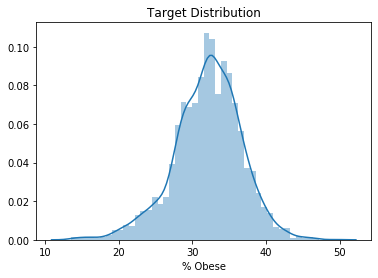

In [21]:
sns.distplot(df_new['% Obese'])
plt.title('Target Distribution')
plt.show()

In [74]:
X=df_new.drop(columns=['FIPS','State','County','% Obese'])
y=df_new['% Obese']

In [75]:
#Splitting Datasets into Training and Testing, ensuring that testing size is at least 1000 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1348)

In [76]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
baseline

0.5897322390225245

In [77]:
lm=LinearRegression()
lm.fit(X_train,y_train)
# Applying 5 folds on the training set and performing cross validation
Kfold = KFold(5)
baseline=np.mean(cross_val_score(lm,X_train,y_train,cv=Kfold))
# R-squared value from baseline model
print(baseline)

0.5834420654878778


In [78]:
X_train

% Fair/Poor  Physically Unhealthy Days  Mentally Unhealthy Days  % Smokers  Food Environment Index  % Physically Inactive  % With Access  % Excessive Drinking   PCP Rate  Dentist Rate   MHP Rate  Graduation Rate  % Some College  Income Ratio  Association Rate  % Severe Housing Problems  % Drive Alone  % Long Commute - Drives Alone  % Frequent Physical Distress  % Frequent Mental Distress  % Food Insecure  % Limited Access  % Insufficient Sleep  % Uninsured  % Homeowners  % Severe Housing Cost Burden  Population  Unemployment_rate_2018  Median_Household_Income_2018  Unemployed_avg(2007-2018)
1784    14.525366                   3.738152                 3.749213  12.924836                     8.4                   22.0      98.577949             17.876235  102.41953      78.18900  304.75032        89.655172       64.926903      5.375378         11.400910                  19.165805      71.106992                           32.0                     11.116458                   11.153197             11.0          3.652384             36.568540    10.894570     64.215028                     17.467474      374733                     3.7                       79979.0                   5.958333
1548    18.779257                   4.571729                 4.479035  21.099179                     7.9                   26.5      55.608534             16.797174   27.77117      27.74695   31.71080        88.800000       52.918149      4.171172         12.695390                  14.656085      76.305295                           42.8                     13.649757                   13.578098             14.6          2.373916             31.857970    16.075026     74.795039                      9.156706       25228                     3.7                       47225.0                   7.733333
649     17.012955                   4.210490                 3.872203  17.631008                     7.3                   22.8      72.577579             21.930793   51.61956      32.44331  178.43818        86.696794       68.757726      6.175528         16.131114                  15.993405      76.932232                           14.2                     12.440884                   12.091491             15.5          6.731746             31.488856     7.607200     66.710217                     12.886646       30823                     5.1                       42887.0                   6.658333
1113    21.961101                   4.264032                 4.466670  21.047356                     7.9                   34.6      46.643356             19.048265   36.71482      39.94248   78.28727        90.900000       44.463207      5.376568          9.098891                  12.654867      83.199112                           38.5                     12.924856                   13.398730             15.3          0.601998             32.357658    17.359968     71.342889                      8.807708       62590                     5.4                       40484.0                   5.983333
2877    18.576533                   3.725420                 3.729874  18.533398                     7.5                   28.8      55.440462             13.298522   55.03043      26.07052   81.47038        92.700000       59.961409      4.698821         13.919461                  15.625000      80.129538                           35.1                     11.653295                   12.089070             15.8          3.870977             37.940809    15.009181     72.151039                     12.260118       30686                     4.1                       44832.0                   7.616667
...           ...                        ...                      ...        ...                     ...                    ...            ...                   ...        ...           ...        ...              ...             ...           ...               ...                        ...            ...                            ...                           ...              

In [79]:
poly = PolynomialFeatures(2, include_bias=False)

X_transformed = poly.fit_transform(X_train)
poly.get_feature_names(X_train.columns)
dfx = pd.DataFrame(X_transformed)
dfx.columns = poly.get_feature_names(X_train.columns)
dfx

% Fair/Poor  Physically Unhealthy Days  Mentally Unhealthy Days  % Smokers  Food Environment Index  % Physically Inactive  % With Access  % Excessive Drinking   PCP Rate  Dentist Rate   MHP Rate  Graduation Rate  % Some College  Income Ratio  Association Rate  % Severe Housing Problems  % Drive Alone  % Long Commute - Drives Alone  % Frequent Physical Distress  % Frequent Mental Distress  % Food Insecure  % Limited Access  % Insufficient Sleep  % Uninsured  % Homeowners  % Severe Housing Cost Burden  Population  Unemployment_rate_2018  Median_Household_Income_2018  Unemployed_avg(2007-2018)  % Fair/Poor^2  % Fair/Poor Physically Unhealthy Days  % Fair/Poor Mentally Unhealthy Days  % Fair/Poor % Smokers  % Fair/Poor Food Environment Index  % Fair/Poor % Physically Inactive  % Fair/Poor % With Access  % Fair/Poor % Excessive Drinking  % Fair/Poor PCP Rate  % Fair/Poor Dentist Rate  % Fair/Poor MHP Rate  % Fair/Poor Graduation Rate  % Fair/Poor % Some College  \
0       14.525366                   3.738152                 3.749213  12.924836                     8.4                   22.0      98.577949             17.876235  102.41953      78.18900  304.75032        89.655172       64.926903      5.375378         11.400910                  19.165805      71.106992                           32.0                     11.116458                   11.153197             11.0          3.652384             36.568540    10.894570     64.215028                     17.467474    374733.0                     3.7                       79979.0                   5.958333     210.986262                              54.298020                            54.458696             187.737978                          122.013076                         319.558055                1431.880811                        259.658853           1487.681174               1135.723854           4426.609982                  1302.274206                  943.087035   
1       18.779257                   4.571729                 4.479035  21.099179                     7.9                   26.5      55.608534             16.797174   27.77117      27.74695   31.71080        88.800000       52.918149      4.171172         12.695390                  14.656085      76.305295                           42.8                     13.649757                   13.578098             14.6          2.373916             31.857970    16.075026     74.795039                      9.156706     25228.0                     3.7                       47225.0                   7.733333     352.660484                              85.853668                            84.112946             396.226903                          148.356128                         497.650303                1044.286937                        315.438446            521.521931                521.067098            595.505254                  1667.597998                  993.763515   
2       17.012955                   4.210490                 3.872203  17.631008                     7.3                   22.8      72.577579             21.930793   51.61956      32.44331  178.43818        86.696794       68.757726      6.175528         16.131114                  15.993405      76.932232                           14.2                     12.440884                   12.091491             15.5          6.731746             31.488856     7.607200     66.710217                     12.886646     30823.0                     5.1                       42887.0                   6.658333     289.440622                              71.632879                            65.877609             299.955531                          124.194568                         387.895363                1234.759048                        373.107587            878.201227                551.956558           3035.760644                  1474.968618                 1169.772059   
3       21.961101                   4.264032                 4.466670  21.047356      

In [80]:
from sklearn.model_selection import cross_validate

scores = cross_validate(regression, X_transformed, y_train, cv=3,
                        scoring=('r2'),
                         return_train_score=True)
# print(scores['test_neg_mean_squared_error'])
print(scores)

{'fit_time': array([0.12663698, 0.08013082, 0.08460999]), 'score_time': array([0.00116086, 0.00122428, 0.00110793]), 'test_score': array([0.49689741, 0.43426626, 0.21023158]), 'train_score': array([0.8145108 , 0.81788668, 0.81139981])}


In [81]:
# lm=LinearRegression()
# lm.fit(X_transformed,y_train)

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,X_transformed)

result=model1.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                % Obese   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     15.40
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:37:28   Log-Likelihood:                -4758.3
No. Observations:                2198   AIC:                         1.038e+04
Df Residuals:                    1767   BIC:                         1.283e+04
Df Model:                         430                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -9.3231      8.871     -1.051      0.2

In [ ]:
calculate_vif(dfx)

dropping'Physically Unhealthy Days % Frequent Physical Distress' at index: 77
dropping'% Frequent Physical Distress' at index: 18
dropping'% Frequent Physical Distress % Frequent Mental Distress' at index: 416


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
def calculate_vif(X, thresh=10):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
              for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping\'' + X.iloc[:, variables].columns[maxloc] +
                 '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [83]:
calculate_vif(X_train)

dropping'% Frequent Physical Distress' at index: 18
dropping'% Frequent Mental Distress' at index: 18
dropping'Food Environment Index' at index: 4
dropping'Physically Unhealthy Days' at index: 1
dropping'% Insufficient Sleep' at index: 18
dropping'% Drive Alone' at index: 14
dropping'Mentally Unhealthy Days' at index: 1
dropping'Graduation Rate' at index: 8
dropping'% Homeowners' at index: 16
dropping'% Fair/Poor' at index: 0
dropping'Income Ratio' at index: 8
dropping'% Some College' at index: 7
dropping'% Smokers' at index: 0
dropping'Unemployed_avg(2007-2018)' at index: 16
dropping'% Severe Housing Problems' at index: 7
dropping'% Excessive Drinking' at index: 2
dropping'% Physically Inactive' at index: 0
dropping'% Food Insecure' at index: 6
dropping'Median_Household_Income_2018' at index: 11
dropping'% Severe Housing Cost Burden' at index: 8
dropping'% With Access' at index: 0
Remaining variables
Index(['PCP Rate', 'Dentist Rate', 'MHP Rate', 'Association Rate', '% Long Commute - 

PCP Rate  Dentist Rate   MHP Rate  Association Rate  % Long Commute - Drives Alone  % Limited Access  % Uninsured  Population  Unemployment_rate_2018
1784  102.41953      78.18900  304.75032         11.400910                           32.0          3.652384    10.894570      374733                     3.7
1548   27.77117      27.74695   31.71080         12.695390                           42.8          2.373916    16.075026       25228                     3.7
649    51.61956      32.44331  178.43818         16.131114                           14.2          6.731746     7.607200       30823                     5.1
1113   36.71482      39.94248   78.28727          9.098891                           38.5          0.601998    17.359968       62590                     5.4
2877   55.03043      26.07052   81.47038         13.919461                           35.1          3.870977    15.009181       30686                     4.1
...         ...           ...        ...               ...                            ...               ...          ...         ...                     ...
1613   73.68280      67.71172  290.32557         12.535645                           12.9          3.467017     8.648625      107810                     2.5
3059  126.30041      68.97632  381.04755         12.517105                           24.1          5.134933     5.608690      536416                     2.2
228   102.74033     113.56173  326.34163          5.684062                           40.4          0.992587     6.197168     1938153                     2.6
720    79.24279      61.89487   30.94743         10.565705                           48.1          4.509808     9.877823       22619                     3.7
741    55.36734      60.74458  170.08484          9.756178                           39.4         10.211115    10.565533      485640                     4.9

[2198 rows x 9 columns]

In [30]:
# keep 8 variables that passed VIF threshold, plus '% Physically Inactive' and '% Food Insecure'


variables = ['% Physically Inactive', 
             '% Food Insecure',
             'PCP Rate', 
             'Dentist Rate', 
             'MHP Rate', 
             'Association Rate', 
             '% Long Commute - Drives Alone', 
             '% Limited Access', 
             '% Uninsured', 
             'Population',
            'Unemployment_rate_2018']

In [58]:
X = df_new.filter(variables, axis=1)
        

        
X

% Physically Inactive  % Food Insecure   PCP Rate  Dentist Rate   MHP Rate  Association Rate  % Long Commute - Drives Alone  % Limited Access  % Uninsured  Population  Unemployment_rate_2018
0                      31.1             13.4   41.50426      32.43010   16.21505         12.631731                           38.3         11.991125    10.961104       55504                     3.6
1                      23.8             12.3   72.87966      49.85232   91.23916         10.692213                           40.5          5.424427    13.570311      212628                     3.6
2                      28.2             23.2   38.51338      35.61535    7.91452          8.472944                           33.8         10.739667    16.542240       25270                     5.2
3                      34.9             15.8   57.41289      26.46903    8.82301         10.157665                           48.6          2.601627    12.297319       22668                     4.0
4                      28.5             11.0   22.52877      20.68502   10.34251          9.011507                           59.7          2.880150    15.564604       58013                     3.5
...                     ...              ...        ...           ...        ...               ...                            ...               ...          ...         ...                     ...
3137                   25.6             11.1   33.96355      52.83227  229.70552          9.962640                           18.6         10.845331    15.270087       43534                     4.2
3138                   12.0              9.9  120.73649      85.96604  416.93531         18.110474                           14.6          7.409463    16.043395       23265                     3.0
3139                   23.5             14.1   38.51153      82.94706  341.54672          5.295335                           17.8          9.727151    15.073191       20495                     4.4
3140                   26.0             12.0   48.57316      74.40476  347.22222         19.429265                           10.6          3.621591    19.590128        8064                     4.2
3141                   22.5             13.8   41.45937      72.18132  173.23517         17.965727                           22.3          4.199467    16.506529        6927                     3.5

[3140 rows x 11 columns]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1348)

In [60]:
X_test.columns

Index(['% Physically Inactive', '% Food Insecure', 'PCP Rate', 'Dentist Rate', 'MHP Rate', 'Association Rate', '% Long Commute - Drives Alone', '% Limited Access', '% Uninsured', 'Population', 'Unemployment_rate_2018'], dtype='object')

In [61]:
X_train.columns

Index(['% Physically Inactive', '% Food Insecure', 'PCP Rate', 'Dentist Rate', 'MHP Rate', 'Association Rate', '% Long Commute - Drives Alone', '% Limited Access', '% Uninsured', 'Population', 'Unemployment_rate_2018'], dtype='object')

In [62]:
X_train

% Physically Inactive  % Food Insecure   PCP Rate  Dentist Rate   MHP Rate  Association Rate  % Long Commute - Drives Alone  % Limited Access  % Uninsured  Population  Unemployment_rate_2018
1784                   22.0             11.0  102.41953      78.18900  304.75032         11.400910                           32.0          3.652384    10.894570      374733                     3.7
1548                   26.5             14.6   27.77117      27.74695   31.71080         12.695390                           42.8          2.373916    16.075026       25228                     3.7
649                    22.8             15.5   51.61956      32.44331  178.43818         16.131114                           14.2          6.731746     7.607200       30823                     5.1
1113                   34.6             15.3   36.71482      39.94248   78.28727          9.098891                           38.5          0.601998    17.359968       62590                     5.4
2877                   28.8             15.8   55.03043      26.07052   81.47038         13.919461                           35.1          3.870977    15.009181       30686                     4.1
...                     ...              ...        ...           ...        ...               ...                            ...               ...          ...         ...                     ...
1613                   11.6             12.0   73.68280      67.71172  290.32557         12.535645                           12.9          3.467017     8.648625      107810                     2.5
3059                   14.6             10.8  126.30041      68.97632  381.04755         12.517105                           24.1          5.134933     5.608690      536416                     2.2
228                    16.1              9.9  102.74033     113.56173  326.34163          5.684062                           40.4          0.992587     6.197168     1938153                     2.6
720                    27.5             11.5   79.24279      61.89487   30.94743         10.565705                           48.1          4.509808     9.877823       22619                     3.7
741                    26.9             15.2   55.36734      60.74458  170.08484          9.756178                           39.4         10.211115    10.565533      485640                     4.9

[2198 rows x 11 columns]

In [67]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
test = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
test

0.5105370248027593

In [69]:
from sklearn.model_selection import cross_validate

scores = cross_validate(regression, X_train, y_train, cv=3,
                        scoring=('r2'),
                         return_train_score=True)
# print(scores['test_neg_mean_squared_error'])
print(scores)


{'fit_time': array([0.01019406, 0.00472713, 0.0046761 ]), 'score_time': array([0.00222301, 0.00217605, 0.00196576]), 'test_score': array([0.55003738, 0.50044089, 0.47128811]), 'train_score': array([0.49594482, 0.52223773, 0.53487682])}


In [70]:
poly = PolynomialFeatures(2, include_bias=False)

X_transformed = poly.fit_transform(X_train)
poly.get_feature_names(X_train.columns)
dfx = pd.DataFrame(X_transformed)
dfx.columns = poly.get_feature_names(X_train.columns)
dfx

% Physically Inactive  % Food Insecure   PCP Rate  Dentist Rate   MHP Rate  Association Rate  % Long Commute - Drives Alone  % Limited Access  % Uninsured  Population  Unemployment_rate_2018  % Physically Inactive^2  % Physically Inactive % Food Insecure  % Physically Inactive PCP Rate  % Physically Inactive Dentist Rate  % Physically Inactive MHP Rate  % Physically Inactive Association Rate  % Physically Inactive % Long Commute - Drives Alone  % Physically Inactive % Limited Access  % Physically Inactive % Uninsured  % Physically Inactive Population  % Physically Inactive Unemployment_rate_2018  % Food Insecure^2  % Food Insecure PCP Rate  % Food Insecure Dentist Rate  % Food Insecure MHP Rate  % Food Insecure Association Rate  % Food Insecure % Long Commute - Drives Alone  % Food Insecure % Limited Access  % Food Insecure % Uninsured  % Food Insecure Population  % Food Insecure Unemployment_rate_2018    PCP Rate^2  PCP Rate Dentist Rate  PCP Rate MHP Rate  \
0                      22.0             11.0  102.41953      78.18900  304.75032         11.400910                           32.0          3.652384    10.894570    374733.0                     3.7                   484.00                                 242.00                     2253.229660                         1720.158000                     6704.507040                              250.820030                                             704.00                                 80.352452                         239.680543                         8244126.0                                         81.40             121.00               1126.614830                    860.079000               3352.253520                        125.410015                                         352.00                         40.176226                   119.840271                   4122063.0                                   40.70  10489.760125            8008.080631       31212.384542   
1                      26.5             14.6   27.77117      27.74695   31.71080         12.695390                           42.8          2.373916    16.075026     25228.0                     3.7                   702.25                                 386.90                      735.936005                          735.294175                      840.336200                              336.427835                                            1134.20                                 62.908768                         425.988190                          668542.0                                         98.05             213.16                405.459082                    405.105470                462.977680                        185.352694                                         624.88                         34.659170                   234.695380                    368328.8                                   54.02    771.237883             770.565265         880.646018   
2                      22.8             15.5   51.61956      32.44331  178.43818         16.131114                           14.2          6.731746     7.607200     30823.0                     5.1                   519.84                                 353.40                     1176.925968                          739.707468                     4068.390504                              367.789392                                             323.76                                153.483819                         173.444164                          702764.4                                        116.28             240.25                800.103180                    502.871305               2765.791790                        250.032262                                         220.10                        104.342070                   117.911603                    477756.5                                   79.05   2664.578975            1674.709387        9210.900339   
3                      34.6             15.3   36.71482      39.94248   78.28727  

In [71]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
test = np.mean(cross_val_score(regression, X_transformed, y_train, scoring='r2', cv=crossvalidation))
test


0.5374230709591418

In [73]:
scores = cross_validate(regression, X_transformed, y_train, cv=3,
                        scoring=('r2'),
                         return_train_score=True)

print(scores)

{'fit_time': array([0.01176405, 0.0067482 , 0.00696135]), 'score_time': array([0.0016911 , 0.00093389, 0.0010078 ]), 'test_score': array([0.57002023, 0.50727637, 0.53128245]), 'train_score': array([0.58874445, 0.62080267, 0.61172606])}


In [64]:
lm=LinearRegression()
lm.fit(X_transformed,y_train)
# Applying 5 folds on the training set and performing cross validation
# Kfold = KFold(5)
baseline=np.mean(cross_val_score(lm,X_transformed,y_train,cv=Kfold))
# R-squared value from baseline model
print(baseline)



0.5320637563985141


In [39]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
test = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
test

0.5105370248027593

In [40]:
from itertools import combinations
combinations = list(combinations(X_train.columns, 2))

interactions = []
data = X_train.copy()
for comb in combinations:
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y_train, scoring='r2', cv=crossvalidation))
    interactions.append((comb[0], comb[1], round(score, 3)))
        
            
print('Top 7 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

Top 7 interactions: [('% Physically Inactive', 'MHP Rate', 0.519), ('% Physically Inactive', 'PCP Rate', 0.518), ('% Physically Inactive', 'Dentist Rate', 0.518), ('PCP Rate', 'Population', 0.515), ('Dentist Rate', '% Long Commute - Drives Alone', 0.514), ('Dentist Rate', '% Limited Access', 0.514), ('MHP Rate', '% Uninsured', 0.513)]


In [41]:
df_inter = X_train.copy()
ls_interactions = sorted(interactions, key=lambda inter: inter[2], reverse=True)
for inter in ls_interactions:
    df_inter[inter[0] + '_' + inter[1]] = X[inter[0]] * X[inter[1]]


In [42]:
df_inter

% Physically Inactive  % Food Insecure   PCP Rate  Dentist Rate   MHP Rate  Association Rate  % Long Commute - Drives Alone  % Limited Access  % Uninsured  Population  Unemployment_rate_2018  % Physically Inactive_MHP Rate  % Physically Inactive_PCP Rate  % Physically Inactive_Dentist Rate  PCP Rate_Population  Dentist Rate_% Long Commute - Drives Alone  Dentist Rate_% Limited Access  MHP Rate_% Uninsured  % Limited Access_% Uninsured  % Food Insecure_MHP Rate  Dentist Rate_Population  MHP Rate_% Long Commute - Drives Alone  Population_Unemployment_rate_2018  % Physically Inactive_% Food Insecure  % Physically Inactive_Association Rate  % Food Insecure_PCP Rate  % Food Insecure_Association Rate  % Food Insecure_% Long Commute - Drives Alone  % Food Insecure_% Limited Access  % Food Insecure_% Uninsured  PCP Rate_% Limited Access  Dentist Rate_% Uninsured  MHP Rate_% Limited Access  MHP Rate_Unemployment_rate_2018  Association Rate_% Long Commute - Drives Alone  \
1784                   22.0             11.0  102.41953      78.18900  304.75032         11.400910                           32.0          3.652384    10.894570      374733                     3.7                     6704.507040                     2253.229660                         1720.158000         3.837998e+07                                 2502.048000                     285.576266           3320.123735                     39.791156               3352.253520             2.930000e+07                             9752.010240                          1386512.1                                 242.00                              250.820030               1126.614830                        125.410015                                         352.00                         40.176226                   119.840271                 374.075470                851.835544                1113.065246                      1127.576184                                      364.829135   
1548                   26.5             14.6   27.77117      27.74695   31.71080         12.695390                           42.8          2.373916    16.075026       25228                     3.7                      840.336200                      735.936005                          735.294175         7.006111e+05                                 1187.569460                      65.868922            509.751936                     38.160758                462.977680             7.000001e+05                             1357.222240                            93343.6                                 386.90                              336.427835                405.459082                        185.352694                                         624.88                         34.659170                   234.695380                  65.926418                446.032944                  75.278768                       117.329960                                      543.362691   
649                    22.8             15.5   51.61956      32.44331  178.43818         16.131114                           14.2          6.731746     7.607200       30823                     5.1                     4068.390504                     1176.925968                          739.707468         1.591070e+06                                  460.695002                     218.400136           1357.414956                     51.209743               2765.791790             1.000000e+06                             2533.822156                           157197.3                                 353.40                              367.789392                800.103180                        250.032262                                         220.10                        104.342070                   117.911603                 347.489789                246.802754                1201.200580                       910.034718                                      229.061814   
1113                   34.6             15.3   36.71482      39.94248 

In [43]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, df_inter, y_train, scoring='r2', cv=crossvalidation))
baseline

0.5200391441773563

In [44]:
X_cubed = X_train.copy()

for column in X_train.columns:
    X_cubed[f'{column}^3'] = X[column]**3

In [45]:
X_cubed

% Physically Inactive  % Food Insecure   PCP Rate  Dentist Rate   MHP Rate  Association Rate  % Long Commute - Drives Alone  % Limited Access  % Uninsured  Population  Unemployment_rate_2018  % Physically Inactive^3  % Food Insecure^3    PCP Rate^3  Dentist Rate^3    MHP Rate^3  Association Rate^3  % Long Commute - Drives Alone^3  % Limited Access^3  % Uninsured^3         Population^3  Unemployment_rate_2018^3
1784                   22.0             11.0  102.41953      78.18900  304.75032         11.400910                           32.0          3.652384    10.894570      374733                     3.7                10648.000           1331.000  1.074356e+06    4.780100e+05  2.830300e+07         1481.898997                        32768.000           48.722477    1293.094598    52621814556090837                    50.653
1548                   26.5             14.6   27.77117      27.74695   31.71080         12.695390                           42.8          2.373916    16.075026       25228                     3.7                18609.625           3112.136  2.141818e+04    2.136219e+04  3.188758e+04         2046.153163                        78402.752           13.378145    4153.890617       16056410652352                    50.653
649                    22.8             15.5   51.61956      32.44331  178.43818         16.131114                           14.2          6.731746     7.607200       30823                     5.1                11852.352           3723.875  1.375444e+05    3.414880e+04  5.681504e+06         4197.522728                         2863.288          305.058581     440.224830       29283617051767                   132.651
1113                   34.6             15.3   36.71482      39.94248   78.28727          9.098891                           38.5          0.601998    17.359968       62590                     5.4                41421.736           3581.577  4.949077e+04    6.372430e+04  4.798146e+05          753.295419                        57066.625            0.218165    5231.746969      245196831979000                   157.464
2877                   28.8             15.8   55.03043      26.07052   81.47038         13.919461                           35.1          3.870977    15.009181       30686                     4.1                23887.872           3944.312  1.666513e+05    1.771940e+04  5.407534e+05         2696.915183                        43243.551           58.004516    3381.200856       28894876468856                    68.921
...                     ...              ...        ...           ...        ...               ...                            ...               ...          ...         ...                     ...                      ...                ...           ...             ...           ...                 ...                              ...                 ...            ...                  ...                       ...
1613                   11.6             12.0   73.68280      67.71172  290.32557         12.535645                           12.9          3.467017     8.648625      107810                     2.5                 1560.896           1728.000  4.000353e+05    3.104499e+05  2.447123e+07         1969.881404                         2146.689           41.674265     646.906026     1253075209541000                    15.625
3059                   14.6             10.8  126.30041      68.97632  381.04755         12.517105                           24.1          5.134933     5.608690      536416                     2.2                 3112.136           1259.712  2.014718e+06    3.281709e+05  5.532705e+07         1961.154012                        13997.521          135.395560     176.434786   154349479754039296                    10.648
228                    16.1              9.9  102.74033     113.56173  326.34163          5.684062                           40.4          0.992587     6.197168     1938153                     2.6                 4173.281     

In [46]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
test = np.mean(cross_val_score(regression, X_cubed, y_train, scoring='r2', cv=crossvalidation))
test

0.4157954271239329

In [47]:
X_squared = X_train.copy()

for column in X_train.columns:
    X_squared[f'{column}^2'] = X[column]**2

In [48]:
X_squared

% Physically Inactive  % Food Insecure   PCP Rate  Dentist Rate   MHP Rate  Association Rate  % Long Commute - Drives Alone  % Limited Access  % Uninsured  Population  Unemployment_rate_2018  % Physically Inactive^2  % Food Insecure^2    PCP Rate^2  Dentist Rate^2     MHP Rate^2  Association Rate^2  % Long Commute - Drives Alone^2  % Limited Access^2  % Uninsured^2   Population^2  Unemployment_rate_2018^2
1784                   22.0             11.0  102.41953      78.18900  304.75032         11.400910                           32.0          3.652384    10.894570      374733                     3.7                   484.00             121.00  10489.760125     6113.519721   92872.757540          129.980759                          1024.00           13.339910     118.691658   140424821289                     13.69
1548                   26.5             14.6   27.77117      27.74695   31.71080         12.695390                           42.8          2.373916    16.075026       25228                     3.7                   702.25             213.16    771.237883      769.893234    1005.574837          161.172927                          1831.84            5.635476     258.406463      636451984                     13.69
649                    22.8             15.5   51.61956      32.44331  178.43818         16.131114                           14.2          6.731746     7.607200       30823                     5.1                   519.84             240.25   2664.578975     1052.568364   31840.184082          260.212829                           201.64           45.316410      57.869495      950057329                     26.01
1113                   34.6             15.3   36.71482      39.94248   78.28727          9.098891                           38.5          0.601998    17.359968       62590                     5.4                  1197.16             234.09   1347.978008     1595.401709    6128.896644           82.789810                          1482.25            0.362402     301.368475     3917508100                     29.16
2877                   28.8             15.8   55.03043      26.07052   81.47038         13.919461                           35.1          3.870977    15.009181       30686                     4.1                   829.44             249.64   3028.348226      679.672013    6637.422817          193.751404                          1232.01           14.984464     225.275509      941630596                     16.81
...                     ...              ...        ...           ...        ...               ...                            ...               ...          ...         ...                     ...                      ...                ...           ...             ...            ...                 ...                              ...                 ...            ...            ...                       ...
1613                   11.6             12.0   73.68280      67.71172  290.32557         12.535645                           12.9          3.467017     8.648625      107810                     2.5                   134.56             144.00   5429.155016     4584.877025   84288.936596          157.142402                           166.41           12.020208      74.798714    11622996100                      6.25
3059                   14.6             10.8  126.30041      68.97632  381.04755         12.517105                           24.1          5.134933     5.608690      536416                     2.2                   213.16             116.64  15951.793566     4757.732721  145197.235361          156.677921                           580.81           26.367540      31.457399   287742125056                      4.84
228                    16.1              9.9  102.74033     113.56173  326.34163          5.684062                           40.4          0.992587     6.197168     1938153                     2.6                   259.21              98.01  10555.575409    12896.266521 

In [49]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
test = np.mean(cross_val_score(regression, X_squared, y_train, scoring='r2', cv=crossvalidation))
test

0.5369062878269597

In [54]:
X_power4 = X_train.copy()

for column in X_train.columns:
    X_power4[f'{column}^2'] = X[column]**2
    X_power4[f'{column}^4'] = X[column]**4

In [55]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
test = np.mean(cross_val_score(regression, X_power4, y_train, scoring='r2', cv=crossvalidation))
test

0.4037590994959956